# Data block API foundations

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
#export
from exp.nb_07a import *

## Image ItemList

We want to read data from disk as we use it and not load everything at once

### Get images

In [3]:
#export
S3 = 'https://s3.amazonaws.com/fast-ai-'
S3_IMAGE = f'{S3}imageclas/'
imagenette_160 = f'{S3_IMAGE}imagenette-160'

import tarfile
from exp.nb_01 import _url2tgz

def url2path(url, data=True, ext='.tgz'):
    "Change `url` to a path."
    name = url2name(url)
    if data:
        return datapath4file(name, ext=ext)

def untar_data(url:str, fname=None, dest=None, data=True, force_download=False):
    "Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`."
    if dest is None:
        dest = url2path(url, data)
    else:
        dest = Path(dest)/url2name(url)
    fname = Path(_url2tgz(url))
    if not dest.exists():
        fname = download_data(url, fname=fname)
        tarfile.open(fname, 'r:gz').extractall(dest.parent)
    return dest

In [4]:
path = untar_data(imagenette_160)
path

PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160')

In [5]:
#export
import PIL, os, mimetypes
Path.ls = lambda x: list(x.iterdir())

In [6]:
path.ls()

[PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val'),
 PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/train')]

In [7]:
(path/'val').ls()

[PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n03888257'),
 PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n03000684'),
 PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n03028079'),
 PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n02102040'),
 PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n03417042'),
 PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n03394916'),
 PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n03445777'),
 PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n03425413'),
 PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n02979186'),
 PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n01440764')]

In [8]:
path_tench = path/'val'/'n01440764'

In [9]:
img_fn = path_tench.ls()[1]
img_fn

PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n01440764/ILSVRC2012_val_00024235.JPEG')

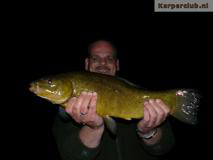

In [10]:
img = PIL.Image.open(img_fn)
img

In [11]:
import numpy
imga = numpy.array(img)

In [12]:
imga.shape

(160, 213, 3)

In [13]:
imga[:10, :10, 0]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [14]:
#export
image_extensions = set(k for k,v in mimetypes.types_map.items() if v.startswith('image/'))

In [15]:
' '.join(image_extensions)

'.rgb .xpm .bmp .svg .jpe .ief .xbm .ico .ras .pbm .ppm .pnm .tif .gif .png .jpg .tiff .pgm .jpeg .xwd'

In [16]:
#export
def setify(o):
    return o if isinstance(o, set) else set(listify(o))

In [17]:
test_eq(setify('aa'), {'a'})
test_eq(setify(['aa',1]), {'aa', 1})
test_eq(setify(None), set())
test_eq(setify(1), {1})
test_eq(setify({1}), {1})

In [18]:
#export
def _get_files(p, fs, extensions=None):
    p = Path(p)
    res = [p/f for f in fs if not f.startswith('.')
          and ((not extensions) or f".{f.split('.')[-1].lower()}" in extensions)]
    return res

In [19]:
t = [o.name for o in os.scandir(path_tench)]
t = _get_files(path, t, extensions=image_extensions)
t[:3]

[PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/ILSVRC2012_val_00031094.JPEG'),
 PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/ILSVRC2012_val_00024235.JPEG'),
 PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/ILSVRC2012_val_00028158.JPEG')]

In [20]:
#export
def get_files(path, extensions=None, recurse=False, include=None):
    path = Path(path)
    extensions = setify(extensions)
    extensions = {e.lower() for e in extensions}
    if recurse:
        res = []
        for p, d, f in os.walk(path): #returns (dirpath, dirnames, filenames)
            if include is not None:
                d[:] = [o for o in d if o in include]
            else:
                d[:] = [o for o in d if not o.startswith('.')]
            res += _get_files(p, f, extensions)
        return res
    else:
        f = [o.name for o in os.scandir(path) if o.is_file()]
        return _get_files(path, f, extensions)

In [21]:
#export
def get_files(path, extensions=None, recurse=False, include=None):
    path = Path(path)
    extensions = setify(extensions)
    extensions = {e.lower() for e in extensions}
    if recurse:
        res = []
        for i, (p, d, f) in enumerate(os.walk(path)): #returns (dirpath, dirnames, filenames)
            if include is not None and i==0:
                d[:] = [o for o in d if o in include]
            else:
                d[:] = [o for o in d if not o.startswith('.')]
            res += _get_files(p, f, extensions)
        return res
    else:
        f = [o.name for o in os.scandir(path) if o.is_file()]
        return _get_files(path, f, extensions)

In [22]:
get_files(path_tench, image_extensions)[:3]

[PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n01440764/ILSVRC2012_val_00031094.JPEG'),
 PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n01440764/ILSVRC2012_val_00024235.JPEG'),
 PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n01440764/ILSVRC2012_val_00028158.JPEG')]

In [23]:
get_files(path, image_extensions, recurse=True)[:3]

[PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n03888257/ILSVRC2012_val_00009873.JPEG'),
 PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n03888257/ILSVRC2012_val_00015787.JPEG'),
 PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n03888257/ILSVRC2012_val_00022638.JPEG')]

In [24]:
all_fns = get_files(path, image_extensions, recurse=True)
len(all_fns)

13394

In [25]:
%timeit -n 10 get_files(path, image_extensions, recurse=True)

74.4 ms ± 558 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Prepare for modeling

In [26]:
#export
def compose(x, funcs, *args, order_key='_order', **kwargs):
    key = lambda o: getattr(o, order_key, 0)
    for f in sorted(listify(funcs), key=key):
        x = f(x, **kwargs)
    return x

class ItemList(ListContainer):
    def __init__(self, items, path='.', tfms=None):
        super().__init__(items)
        self.path, self.tfms = Path(path), tfms
        
    def __repr__(self):
        return f'{super().__repr__()}\nPath: {self.path}'
    
    def new(self, items, cls=None):
        if cls is None:
            cls = self.__class__
        return cls(items, self.path, tfms = self.tfms)
    
    def get(self, i):
        return i
    
    def _get(self, i):
        return compose(self.get(i), self.tfms)
    
    def __getitem__(self, idx):
        res = super().__getitem__(idx)
        if isinstance(res, list):
            return [self._get(o) for o in res]
        return self._get(res)
    
class ImageList(ItemList):
    @classmethod
    def from_files(cls, path, extensions=None, recurse=True, include=None, **kwargs):
        if extensions is None:
            extensions = image_extensions
        return cls(get_files(path, extensions, recurse=recurse, include=include), path, **kwargs)
    
    def get(self, fn):
        return PIL.Image.open(fn)

In [27]:
#export
class Transform():
    _order = 0
    
class MakeRGB(Transform):
    def __call__(self, item):
        return item.convert('RGB')

def make_rgb(item):
    return item.convert('RGB')

In [28]:
il = ImageList.from_files(path, tfms=make_rgb)

In [29]:
il

ImageList(13394 items)
[PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n03888257/ILSVRC2012_val_00009873.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n03888257/ILSVRC2012_val_00015787.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n03888257/ILSVRC2012_val_00022638.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n03888257/ILSVRC2012_val_00002665.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n03888257/ILSVRC2012_val_00044850.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n03888257/ILSVRC2012_val_00009559.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n03888257/ILSVRC2012_val_00009269.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n03888257/ILSVRC2012_val_00039045.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n03888257/ILSVRC2012_val_00006561.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n0388825

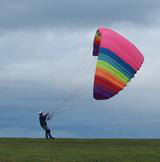

In [30]:
img = il[0]; img

In [31]:
il[:1]

[<PIL.Image.Image image mode=RGB size=160x162 at 0x7F1A5C537F10>]

## Split validation set

In [32]:
fn = il.items[0]; fn

PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/val/n03888257/ILSVRC2012_val_00009873.JPEG')

In [33]:
fn.parent.parent.name

'val'

In [34]:
#export
def grandparent_splitter(fn, valid_name='valid', train_name='train'):
    gp = fn.parent.parent.name
    if gp==valid_name:
        return True
    elif gp==train_name:
        return False
    else:
        return None
    
def split_by_func(ds, f):
    items = ds.items
    mask = [f(o) for o in items]
    # `None` values will be filtered out
    train = [o for o,m in zip(items, mask) if m==False]
    valid = [o for o,m in zip(items, mask) if m==True]
    return train, valid

In [35]:
splitter = partial(grandparent_splitter, valid_name='val')

In [36]:
%time train, valid = split_by_func(il, splitter)

CPU times: user 40 ms, sys: 0 ns, total: 40 ms
Wall time: 39.7 ms


In [37]:
len(train), len(valid)

(12894, 500)

In [38]:
#export
class SplitData():
    def __init__(self, train, valid):
        self.train, self.valid = train, valid
        
    def __getattr__(self, k):
        return getattr(self.train, k)
    
    @classmethod
    def split_by_func(cls, il, f):
        lists = map(il.new, split_by_func(il, f))
        return cls(*lists)
    
    def __repr__(self):
        return f'{self.__class__.__name__}\nTrain: {self.train}\nValid: {self.valid}\n'

In [39]:
sd = SplitData.split_by_func(il, splitter); sd

SplitData
Train: ImageList(12894 items)
[PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/train/n03888257/n03888257_14974.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/train/n03888257/n03888257_6369.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/train/n03888257/n03888257_21399.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/train/n03888257/n03888257_34374.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/train/n03888257/n03888257_10564.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/train/n03888257/n03888257_36971.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/train/n03888257/n03888257_10844.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/train/n03888257/n03888257_50367.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/train/n03888257/n03888257_65206.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/train/n03888257/n03888257_46572.JPEG')...]
Path: /

## Labeling

In [40]:
#export
from collections import OrderedDict

def uniqueify(x, sort=False):
    res = list(OrderedDict.fromkeys(x).keys())
    if sort:
        res.sort()
    return res

In [41]:
#export
class Processor():
    def process(self, items):
        return items
    
class CategoryProcessor(Processor):
    def __init__(self):
        self.vocab = None
        
    def process(self, items):
        if self.vocab is None:
            self.vocab = uniqueify(items)
            self.otoi = {v:k for k,v in enumerate(self.vocab)}
        return [self.proc1(o) for o in items]
    
    def proc1(self, item):
        return self.otoi[item]
    
    def deprocess(self, idxs):
        assert self.vocab is not None
        return [self.deproc1(idx) for idx in idxs]
    
    def deproc1(self, idx):
        return self.vocab[idx]
    
class ProcessedItemList(ListContainer):
    def __init__(self, inputs, processor):
        self.processor = processor
        items = processor.process(inputs)
        super().__init__(items)
        
    def obj(self, idx):
        res = self[idx]
        if isinstance(res, (tuple, list, Generator)):
            return self.processor.deprocess(res)
        return self.processor.deproc1(idx)

In [42]:
#export
def parent_labeler(fn):
    return fn.parent.name

def _label_by_func(ds, f):
    return [f(o) for o in ds.items]

class LabeledData():
    def __init__(self, x, y):
        self.x, self.y = x, y
        
    def __repr__(self):
        return f'{self.__class__.__name__}\nx: {self.x}\ny: {self.y}\n'
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    
    def __len__(self):
        return len(self.x)
    
    @classmethod
    def label_by_func(cls, il, f, proc=None):
        labels = _label_by_func(il, f)
        proc_labels = ProcessedItemList(labels, proc)
        return cls(il, proc_labels)
    
def label_by_func(sd, f):
    proc = CategoryProcessor()
    train = LabeledData.label_by_func(sd.train, f, proc)
    valid = LabeledData.label_by_func(sd.valid, f, proc)
    return SplitData(train, valid)

In [43]:
ll = label_by_func(sd, parent_labeler)

In [44]:
assert ll.train.y.processor is ll.valid.y.processor

In [45]:
ll.train.y.items[0], ll.train.y.obj(0), ll.train.y.obj(slice(2))

(0, 'n03888257', ['n03888257', 'n03888257'])

In [46]:
ll

SplitData
Train: LabeledData
x: ImageList(12894 items)
[PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/train/n03888257/n03888257_14974.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/train/n03888257/n03888257_6369.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/train/n03888257/n03888257_21399.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/train/n03888257/n03888257_34374.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/train/n03888257/n03888257_10564.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/train/n03888257/n03888257_36971.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/train/n03888257/n03888257_10844.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/train/n03888257/n03888257_50367.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/train/n03888257/n03888257_65206.JPEG'), PosixPath('/home/ubuntu/learnai/dl/data/imagenette-160/train/n03888257/n03888257_46572.JPE

### Transform to tensor

In [47]:
ll.train[0]

(<PIL.Image.Image image mode=RGB size=160x240 at 0x7F1A5C4D1F10>, 0)

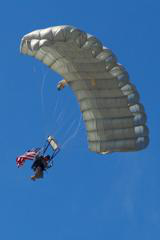

In [48]:
ll.train[0][0] #labeledlist

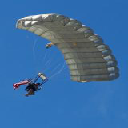

In [49]:
ll.train[0][0].resize((128,128))

In [50]:
#export
class ResizeFixed(Transform):
    _order = 10
    def __init__(self, size):
        if isinstance(size, int):
            size = (size, size)
        self.size = size
        
    def __call__(self, item):
        return item.resize(self.size, PIL.Image.BILINEAR)
    
def to_byte_tensor(item):
    res = torch.ByteTensor(torch.ByteStorage.from_buffer(item.tobytes()))
    w,h = item.size
    return res.view(h,w,-1).permute(2,0,1)
to_byte_tensor._order=20

def to_float_tensor(item):
    return item.float().div_(255.)
to_float_tensor._order=30

In [51]:
tfms = [make_rgb, ResizeFixed(128), to_byte_tensor, to_float_tensor]

il = ImageList.from_files(path, tfms=tfms)
sd = SplitData.split_by_func(il, splitter)
ll = label_by_func(sd, parent_labeler)

In [52]:
#export
def show_image(im, figsize=(3,3)):
    plt.figure(figsize=figsize)
    plt.axis('off')
    plt.imshow(im.permute(1,2,0))

In [53]:
x, y = ll.train[0]
x.shape

torch.Size([3, 128, 128])

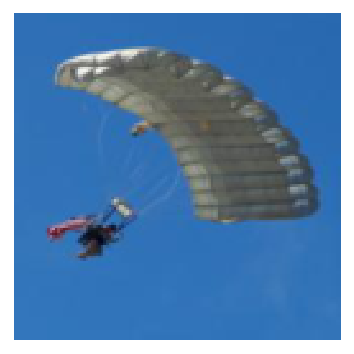

In [54]:
show_image(x)

In [55]:
type(x)

torch.Tensor

## Modeling

### DataBunch

In [56]:
bs = 64

In [57]:
train_dl, valid_dl = get_dls(ll.train, ll.valid, bs, num_workers=4)

In [58]:
x, y = next(iter(train_dl))

In [59]:
x.shape

torch.Size([64, 3, 128, 128])

'n02979186'

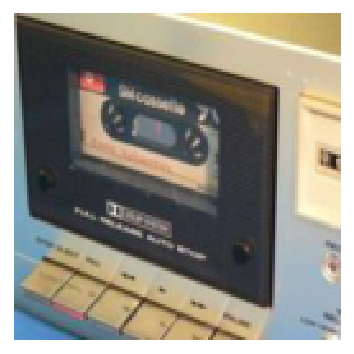

In [60]:
show_image(x[0])
ll.train.y.processor.vocab[y[0]]

In [61]:
y

tensor([8, 1, 6, 8, 6, 4, 7, 0, 1, 7, 8, 7, 4, 6, 6, 5, 3, 9, 7, 6, 0, 8, 6, 6,
        7, 9, 3, 7, 5, 4, 2, 9, 2, 0, 7, 1, 2, 3, 8, 6, 2, 8, 2, 5, 3, 9, 7, 8,
        9, 7, 7, 7, 3, 1, 7, 1, 7, 8, 8, 7, 5, 6, 0, 4])

In [62]:
#export
class DataBunch():
    def __init__(self, train_dl, valid_dl, c_in=None, c_out=None):
        self.train_dl, self.valid_dl, self.c_in, self.c_out = \
        train_dl, valid_dl, c_in, c_out
        
    @property
    def train_ds(self):
        return self.train_dl.dataset
    
    @property
    def valid_ds(self):
        return self.valid_dl.dataset

In [63]:
#export
def databunchify(sd, bs, c_in=None, c_out=None, **kwargs):
    dls = get_dls(sd.train, sd.valid, bs, **kwargs)
    return DataBunch(*dls, c_in=c_in, c_out=c_out)

SplitData.to_databunch = databunchify

In [64]:
path = untar_data(imagenette_160)
tfms = [make_rgb, ResizeFixed(128), to_byte_tensor, to_float_tensor]

il = ImageList.from_files(path, tfms=tfms)
sd = SplitData.split_by_func(il, partial(grandparent_splitter, valid_name='val'))
ll = label_by_func(sd, parent_labeler)
data = ll.to_databunch(bs, c_in=3, c_out=10, num_workers=4)

## Model

In [65]:
cbfs = [partial(AvgStatsCallback, accuracy), CudaCallback]

In [66]:
m, s = x.mean((0,2,3)).cuda(), x.std((0,2,3)).cuda()
m, s

(tensor([0.4542, 0.4489, 0.4147], device='cuda:0'),
 tensor([0.2663, 0.2648, 0.2803], device='cuda:0'))

In [67]:
#export
def normalize_chan(x, mean, std):
    return (x-mean[..., None, None]) / std[..., None, None]

_m = tensor([0.45, 0.46, 0.42])
_s = tensor([0.27, 0.26, 0.29])
norm_imagenette = partial(normalize_chan, mean = _m.cuda(), std = _s.cuda())

In [68]:
cbfs.append(partial(BatchTransformXCallback, norm_imagenette))

In [69]:
nfs = [64, 64, 128, 256]

In [70]:
#export
import math
def prev_pow_2(x):
    return 2**math.floor(math.log2(x))

def get_cnn_layers(data, nfs, layer, **kwargs):
    def f(ni, nf, stride=2):
        return layer(ni, nf, 3, stride=stride, **kwargs)
    
    l1 = data.c_in
    l2 = prev_pow_2(l1*3*3)
    layers = [f(l1, l2, stride=1),
             f(l2, l2*2, stride=2),
             f(l2*2, l2*4, stride=2)]
    nfs = [l2*4] + nfs
    layers += [f(nfs[i], nfs[i+1]) for i in range(len(nfs)-1)]
    layers += [nn.AdaptiveAvgPool2d(1), Lambda(flatten),
              nn.Linear(nfs[-1], data.c_out)]
    return layers

def get_cnn_model(data, nfs, layer, **kwargs):
    return nn.Sequential(*get_cnn_layers(data, nfs, layer, **kwargs))

def get_learn_run(nfs, data, lr, layer, cbs=None, opt_func=None, **kwargs):
    model = get_cnn_model(data, nfs, layer, **kwargs)
    init_cnn(model)
    return get_runner(model, data, lr=lr, cbs=cbs, opt_func=opt_func)

def cos_1cycle_anneal(start, high, end):
    return [sched_cos(start, high), sched_cos(high, end)]

In [71]:
sched = combine_scheds([0.3, 0.7], cos_1cycle_anneal(0.1, 0.3, 0.05))

In [72]:
learn, run = get_learn_run(nfs, data, 0.2, conv_layer, cbs=cbfs+[
    partial(ParamScheduler, 'lr', sched)
])

In [73]:
#export
def model_summary(run, learn, find_all=False):
    xb, yb = get_batch(data.valid_dl, run)
    device = next(learn.model.parameters()).device
    xb, yb = xb.to(device), yb.to(device)
    if find_all:
        mods = find_modules(learn.model, is_lin_layer)
    else:
        mods = learn.model.children()
    f = lambda hook, mod, inp, out: print(f'{mod}\n{out.shape}\n')
    with Hooks(mods, f) as hooks: learn.model(xb)

In [74]:
model_summary(run, learn)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): GeneralRelu()
  (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([128, 16, 128, 128])

Sequential(
  (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (1): GeneralRelu()
  (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([128, 32, 64, 64])

Sequential(
  (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (1): GeneralRelu()
  (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([128, 64, 32, 32])

Sequential(
  (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (1): GeneralRelu()
  (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([128, 64, 16, 16])

Sequential(
  (0): Conv2d(64, 64, kernel_size=(

In [75]:
%time run.fit(5, learn)

train: [1.6881910311966806, tensor(0.4230, device='cuda:0')]
valid: [2.05338720703125, tensor(0.3840, device='cuda:0')]
train: [1.3004328563673027, tensor(0.5747, device='cuda:0')]
valid: [1.24042333984375, tensor(0.6020, device='cuda:0')]
train: [0.9379806317376299, tensor(0.6924, device='cuda:0')]
valid: [1.0656846923828125, tensor(0.6620, device='cuda:0')]
train: [0.6355536005118659, tensor(0.7983, device='cuda:0')]
valid: [0.8567991943359375, tensor(0.7300, device='cuda:0')]
train: [0.37869304824433847, tensor(0.8926, device='cuda:0')]
valid: [0.8746356811523438, tensor(0.7320, device='cuda:0')]
CPU times: user 42 s, sys: 16.9 s, total: 58.9 s
Wall time: 1min 4s


# Export

In [76]:
!python notebook2script.py 08_data_block.ipynb

converted 08_data_block.ipynb to nb_08.py
